In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import keras
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator

In [4]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [5]:
import os
def plot_imgs(directory, top=10):
    all_item_dirs = os.listdir(directory)
    item_files = [os.path.join(directory, file) for file in all_item_dirs][:5]
  
    plt.figure(figsize=(20, 20))
  
    for i, img_path in enumerate(item_files):
        plt.subplot(10, 10, i+1)
    
        img = plt.imread(img_path)
        plt.tight_layout()         
        plt.imshow(img, cmap='gray') 

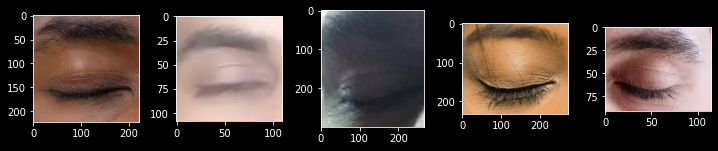

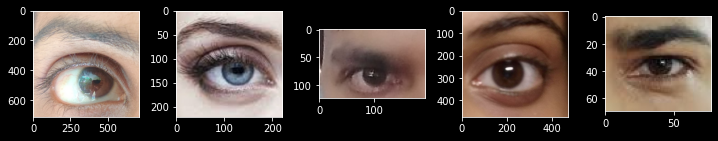

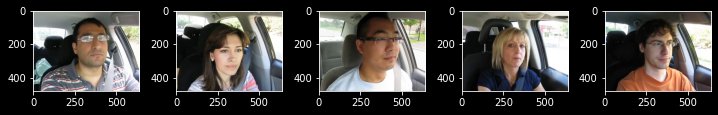

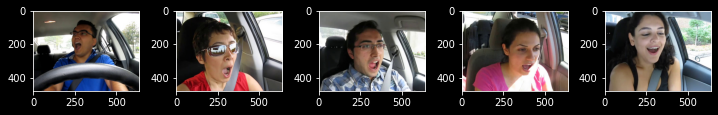

In [6]:
data_path = '../input/yawn-eye-dataset-new/dataset_new/train'

directories = ['/Closed', '/Open', '/no_yawn', '/yawn']

for j in directories:
    plot_imgs(data_path+j)

In [7]:
batch_size = 128
train_datagen = ImageDataGenerator(horizontal_flip = True, 
                                  rescale = 1./255, 
                                  zoom_range = 0.2, 
                                  validation_split = 0.1)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [8]:
train_data_path = '../input/yawn-eye-dataset-new/dataset_new/train'
test_data_path = '../input/yawn-eye-dataset-new/dataset_new/test'

train_set = train_datagen.flow_from_directory(train_data_path, target_size = (256,256),
                                              batch_size = batch_size, 
                                              color_mode = 'grayscale',
                                              class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_data_path, target_size = (256,256),
                                              batch_size = batch_size, 
                                              color_mode = 'grayscale',
                                              class_mode = 'categorical')

Found 2467 images belonging to 4 classes.
Found 433 images belonging to 4 classes.


In [9]:
classes = 4

model = Sequential()
model.add(Conv2D(32, (3,3), padding = 'same', input_shape = (256,256,1), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(128,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))

model.add(Dense(classes, activation = 'softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 131072)            0

2022-05-03 13:03:04.148165: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [10]:
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam' , metrics = ['accuracy'])


In [11]:
model_path="yawn_detection1.h5"

checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, 
                              save_best_only=True, mode='max')

callbacks_list = [checkpoint]

In [12]:
num_epochs = 10
training_steps=train_set.n//train_set.batch_size
validation_steps =test_set.n//test_set.batch_size

In [13]:
history = model.fit_generator(train_set, epochs=num_epochs, steps_per_epoch=training_steps,validation_data=test_set,
                    validation_steps=validation_steps, callbacks = callbacks_list)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-05-03 13:03:18.875998: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
19/19 [==============================] - 146s 7s/step - loss: 1.5260 - accuracy: 0.3117 - val_loss: 1.0701 - val_accuracy: 0.4818

Epoch 00001: val_accuracy improved from -inf to 0.48177, saving model to yawn_detection1.h5
Epoch 2/10
19/19 [==============================] - 136s 7s/step - loss: 0.8785 - accuracy: 0.6319 - val_loss: 0.6525 - val_accuracy: 0.7266

Epoch 00002: val_accuracy improved from 0.48177 to 0.72656, saving model to yawn_detection1.h5
Epoch 3/10
19/19 [==============================] - 136s 7s/step - loss: 0.5751 - accuracy: 0.7366 - val_loss: 0.4946 - val_accuracy: 0.8047

Epoch 00003: val_accuracy improved from 0.72656 to 0.80469, saving model to yawn_detection1.h5
Epoch 4/10
19/19 [==============================] - 135s 7s/step - loss: 0.4654 - accuracy: 0.7798 - val_loss: 0.4726 - val_accuracy: 0.7604

Epoch 00004: val_accuracy did not improve from 0.80469
Epoch 5/10
19/19 [==============================] - 135s 7s/step - loss: 0.4697 - accuracy: 0.7

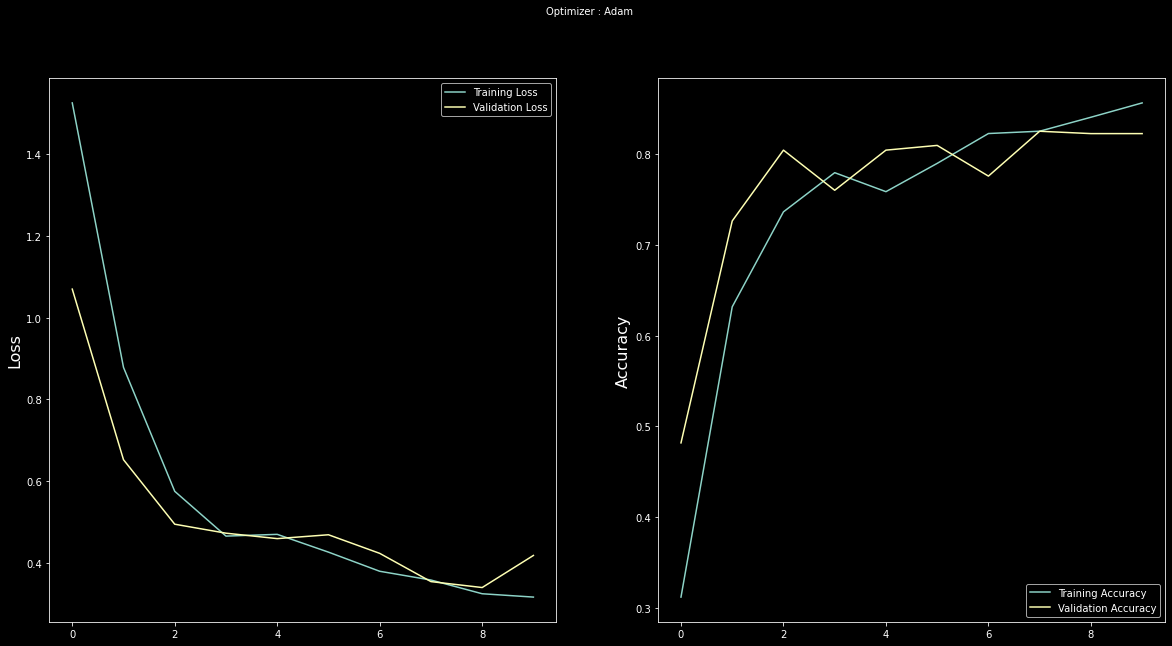

In [14]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()






VGG MODEL

In [15]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
import numpy as np

In [19]:
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam' , metrics = ['accuracy'])

In [17]:
classes = 4

model = Sequential()
model.add(Conv2D(32, (3,3), padding = 'same', input_shape = (256,256,1), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(128,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))

model.add(Dense(classes, activation = 'softmax'))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 256, 256, 32)      320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 131072)           

In [20]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')
history = model.fit_generator(train_set, epochs=num_epochs, steps_per_epoch=training_steps,validation_data=test_set,
                    validation_steps=validation_steps, callbacks = callbacks_list)

Epoch 1/10
19/19 [==============================] - 131s 7s/step - loss: 1.4425 - accuracy: 0.3677 - val_loss: 1.1140 - val_accuracy: 0.5365

Epoch 00001: val_accuracy did not improve from 0.82552
Epoch 2/10
19/19 [==============================] - 129s 7s/step - loss: 0.7772 - accuracy: 0.6986 - val_loss: 0.6622 - val_accuracy: 0.7240

Epoch 00002: val_accuracy did not improve from 0.82552
Epoch 3/10
19/19 [==============================] - 128s 7s/step - loss: 0.5509 - accuracy: 0.7512 - val_loss: 0.6182 - val_accuracy: 0.7109

Epoch 00003: val_accuracy did not improve from 0.82552
Epoch 4/10
19/19 [==============================] - 128s 7s/step - loss: 0.4762 - accuracy: 0.7747 - val_loss: 0.4539 - val_accuracy: 0.7552

Epoch 00004: val_accuracy did not improve from 0.82552
Epoch 5/10
19/19 [==============================] - 128s 7s/step - loss: 0.4085 - accuracy: 0.8063 - val_loss: 0.4368 - val_accuracy: 0.7865

Epoch 00005: val_accuracy did not improve from 0.82552
Epoch 6/10
19/1

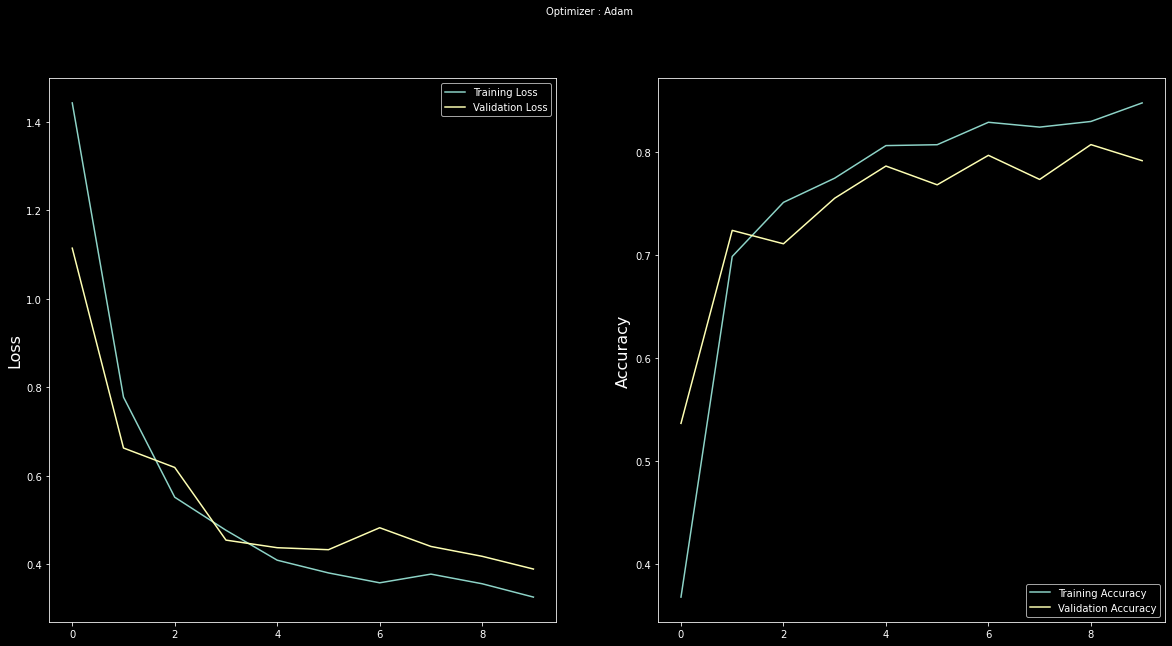

In [21]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()